In [12]:
import pandas as pd

history = pd.read_csv('data/unique_video_browsing_history_full_tiktok_data.csv')
likes = pd.read_csv('data/likes_full_tiktok_data.csv')
favorites = pd.read_csv('data/favorite_videos_full_tiktok_data.csv')
share = pd.read_csv('data/share_history_full_tiktok_data.csv')

history = history.sort_values(by=["Date"])
likes = likes.sort_values(by=["Date"])
favorites = favorites.sort_values(by=["Date"])
share = share.sort_values(by=["Date"])

In [80]:
# relacionar likes, shares, favorites, history
# share and history have a limit of date
# likes and favorites have a number limit
# so to relate them all together we need to see the oldest date of likes and favorites
oldest_date_likes = likes['Date'].min()
oldest_date_favorites = favorites['Date'].min()

# most recent date of likes and favorites
base_date = max(oldest_date_likes, oldest_date_favorites)

In [81]:
# filter the dataframes to only have the data from the base date
likes_relate = likes[likes['Date'] >= base_date]
favorites_relate = favorites[favorites['Date'] >= base_date]
share_relate = share[share['Date'] >= base_date]
history_relate = history[history['Date'] >= base_date]

In [82]:
# Function to compare the position change between two DataFrames
def compare_positions(df1, df2, name1, name2, element_name):
    # Assuming 'Username' is the common column in both DataFrames
    df1['Position_' + name1] = df1.index + 1 
    df2['Position_' + name2] = df2.index + 1

    # Merge the DataFrames on the 'Username' column
    merged_df = pd.merge(df1, df2, on=element_name, how='right')

    # Calculate the change in positions
    merged_df['Change'] = merged_df['Position_' + name1] - merged_df['Position_' + name2]
    merged_df['Arrow'] = merged_df['Change'].apply(lambda x: '↑' if x > 0 else ('↓' if x < 0 else ('=' if x == 0 else 'New Entry')))

    # Display the changes
    print(f'Comparison between {name1} and {name2}:')
    # print(merged_df[[element_name, 'Position_' + name1, 'Position_' + name2, 'Arrow']])
    print(merged_df[[element_name, 'Arrow']])

In [83]:
# Visualization of Username 
def top_following(df, name):
    # Assuming 'Username' is the column containing usernames in the history DataFrame
    username_counts = df['Username'].value_counts().reset_index()

    # Rename the columns for clarity
    username_counts.columns = ['Username', 'Count']

    # Sort the DataFrame based on the 'Username' column
    sorted_username_counts = username_counts.sort_values(by='Count', ascending=False)

    # Display the sorted and counted data
    print(name)
    return sorted_username_counts


In [84]:
top_history = top_following(history_relate, "History").head(10)
print(top_history)

History
              Username  Count
0            batmanbff    352
1   batfamilyprotector    281
2  lindsaybrookethomas    263
3        cthulhu_queef    241
4      maya.and.hunter    185
5         haleyybaylee    165
6         robinswonder    141
7  sarahmakeupandbooks    111
8        thekylemarisa    107
9                chris    102


In [85]:
top_likes = top_following(likes_relate, "Likes").head(10)
compare_positions(top_history, top_likes, "History", "Likes", "Username")

Likes
Comparison between History and Likes:
              Username      Arrow
0  lindsaybrookethomas          ↑
1         haleyybaylee          ↑
2      maya.and.hunter          ↑
3        cthulhu_queef          =
4                chris          ↑
5   swellentertainment  New Entry
6  sarahmakeupandbooks          ↑
7        blakespopnook  New Entry
8      devotedly.yours  New Entry
9        tristansacrey  New Entry


In [86]:
top_favorites = top_following(favorites_relate, "Favorites").head(10)
compare_positions(top_history, top_favorites, "History", "Favorites", "Username")

Favorites
Comparison between History and Favorites:
                   Username      Arrow
0                     chris          ↑
1            barstoolsports  New Entry
2             jessicagolich  New Entry
3                vanderavis  New Entry
4             emmaspacelynn  New Entry
5             kianimargolis  New Entry
6               tayamillerr  New Entry
7                 aedanvers  New Entry
8  therainsoncorneliastreet  New Entry
9            alluringallura  New Entry


In [87]:
top_shares = top_following(share_relate, "Share").head(10)
compare_positions(top_history, top_shares, "History", "Share", "Username")

Share
Comparison between History and Share:
               Username      Arrow
0                 chris          ↑
1       devotedly.yours  New Entry
2          swifthazed13  New Entry
3  sportsillustrated_f1  New Entry
4         jessicagolich  New Entry
5       nikitadumptruck  New Entry
6               vialsss  New Entry
7   bethany_pendleton13  New Entry
8          simplysimone  New Entry
9       stoolpresidente  New Entry


In [88]:
def top_sound(df, name):
    # Exclude rows where 'Song Name' contains the word 'original', count occurrences, and sort by count
    filtered_song_counts = df[~df['Sound Name'].str.contains('original', case=False, na=False)]
    #filtered_song_counts = filtered_song_counts[~filtered_song_counts['Sound Name'].str.contains('Promoted Music', case=False, na=False)]
    filtered_song_counts = filtered_song_counts[~filtered_song_counts['Sound Name'].str.contains("This sound isn't available", case=False, na=False)]
    song_counts = filtered_song_counts['Sound Name'].value_counts().reset_index()
    song_counts.columns = ['Sound Name', 'Count']
    sorted_song_counts = song_counts.sort_values(by='Count', ascending=False)

    print(name)
    # Display the first 50 rows
    return sorted_song_counts    

In [89]:
top_sound_history = top_sound(history_relate, "History").head(10)
print(top_sound_history)

History
                                          Sound Name  Count
0                                     Promoted Music    868
1             Love You So - The King Khan & BBQ Show    117
2                        Cruel Summer - Taylor Swift    102
3                   bad idea right? - Olivia Rodrigo     77
4                               Karma - Taylor Swift     61
5                                   orijinal ses - ✮     56
6  Dance The Night (From Barbie The Album) - Dua ...     54
7  I Can See You (Taylor’s Version) (From The Vau...     53
9  What Was I Made For? [From The Motion Picture ...     48
8                      Paint The Town Red - Doja Cat     48


In [90]:
top_sound_likes = top_sound(likes_relate, "Likes").head(10)
compare_positions(top_sound_history, top_sound_likes, "History", "Likes", "Sound Name")

Likes
Comparison between History and Likes:
                                          Sound Name      Arrow
0                        Cruel Summer - Taylor Swift          ↑
1  What Was I Made For? [From The Motion Picture ...          ↑
2                   bad idea right? - Olivia Rodrigo          ↑
3  I Can See You (Taylor’s Version) (From The Vau...          ↑
4                      Paint The Town Red - Doja Cat          ↑
5   Speed Drive (From Barbie The Album) - Charli XCX  New Entry
6  Monkeys Spinning Monkeys - Kevin MacLeod & Kev...  New Entry
7                       Lil Boo Thang - Paul Russell  New Entry
8  Dance The Night (From Barbie The Album) - Dua ...          ↓
9                      Vigilante Shit - Taylor Swift  New Entry


In [91]:
top_sound_favorites = top_sound(favorites_relate, "Favorites").head(10)
compare_positions(top_sound_history, top_sound_favorites, "History", "Favorites", "Sound Name")

Favorites
Comparison between History and Favorites:
                                          Sound Name      Arrow
0  Suspenseful and tense orchestra(1318015) - SoL...  New Entry
1  Redbone (feat. The Notorious B.I.G. & 2Pac) - ...  New Entry
2                        watch me shine - ⠀ ⠀ ⠀ ⠀ ⠀︎  New Entry
3                          London Boy - Taylor Swift  New Entry
4                          The View - Marshall Magic  New Entry
5                    invisible string - Taylor Swift  New Entry
6  I Can See You (Taylor’s Version) (From The Vau...          ↓
7    bad idea right Olivia Rodrigo - user12418621419  New Entry
8  Chopin Nocturne No. 2 Piano Mono - moshimo sou...  New Entry
9                  Life is a Highway - Rascal Flatts  New Entry


In [92]:
top_share_sound = top_sound(share_relate, "Share").head(10)
compare_positions(top_sound_history, top_share_sound, "History", "Share", "Sound Name")

Share
Comparison between History and Share:
                                          Sound Name      Arrow
0                   bad idea right? - Olivia Rodrigo          ↑
1                          London Boy - Taylor Swift  New Entry
2                               Karma - Taylor Swift          ↑
3  Suspenseful and tense orchestra(1318015) - SoL...  New Entry
4                       Lil Boo Thang - Paul Russell  New Entry
5  my tears ricochet nightcore - dani (taylor’s v...  New Entry
6   Speed Drive (From Barbie The Album) - Charli XCX  New Entry
7  Spongebob Tomfoolery - Dante9k Remix - David S...  New Entry
8                      Formula 1 Theme - Brian Tyler  New Entry
9                        Cruel Summer - Taylor Swift          ↓


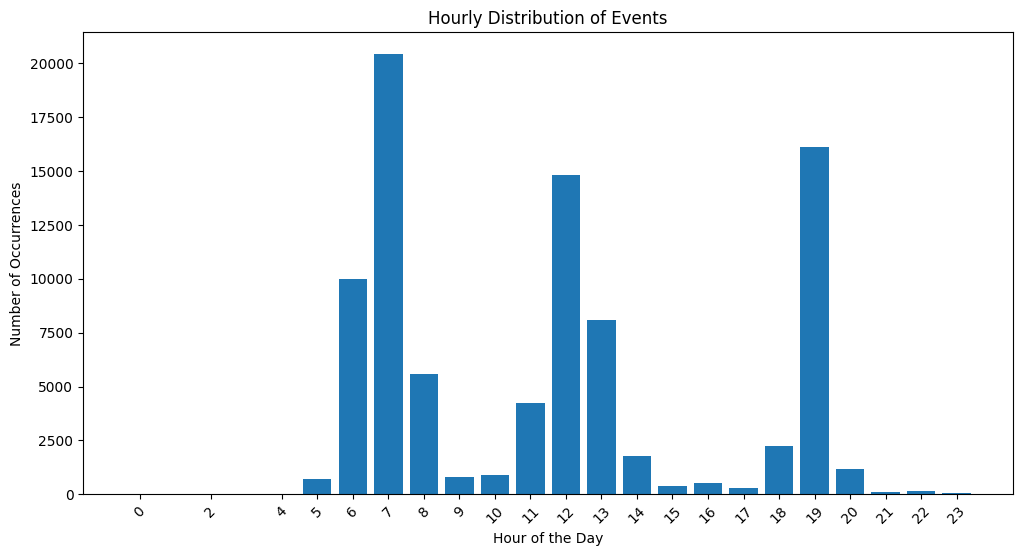

In [4]:
## Convert the 'Date' column to a datetime object
history['Date'] = pd.to_datetime(history['Date'])

## Extract the hour information
history['Hour'] = history['Date'].dt.hour

## Count the occurences of each hour
hourly_counts = history['Hour'].value_counts().sort_index()

## Plot an hourly graph
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(hourly_counts.index, hourly_counts.values, tick_label=hourly_counts.index)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Occurrences')
plt.title('Hourly Distribution of Events')
plt.xticks(rotation=45)
plt.show()

In [5]:
## Visualization of Average time per day/month 

# Sort the DataFrame by 'Date'
history = history.sort_values(by='Date')

# Calculate session durations considering intervals longer than 2 minutes as separate sessions
session_threshold = pd.Timedelta(minutes=2)
history['SessionId'] = (history['Date'].diff() > session_threshold).cumsum()

# Calculate session durations in seconds and save the day of the session
session_durations = history.groupby('SessionId').agg(
    SessionDuration=('Date', lambda x: (x.max() - x.min()).total_seconds()),
    SessionDay=('Date', lambda x: x.min().strftime('%Y-%m-%d')),
    SessionMonth=('Date', lambda x: x.min().strftime('%Y-%m'))
)


# Calculate total duration per day
total_duration_per_day  = session_durations.groupby('SessionDay').agg(
    Duration=('SessionDuration', lambda x: x.sum() / 3600)
)

print(total_duration_per_day)

# Calculate total duration per month
total_duration_per_month = session_durations.groupby('SessionMonth').agg(
    Duration=('SessionDuration', lambda x: x.sum() / 3600)
)

print(total_duration_per_month)


            Duration
SessionDay          
2023-04-02  1.659722
2023-04-03  2.126944
2023-04-04  1.640000
2023-04-05  2.754722
2023-04-06  2.328056
...              ...
2023-09-24  2.012222
2023-09-25  1.519444
2023-09-26  1.962500
2023-09-27  2.747222
2023-09-28  0.085556

[176 rows x 1 columns]
               Duration
SessionMonth           
2023-04       40.291944
2023-05       36.321944
2023-06       58.286389
2023-07       48.510278
2023-08       60.093611
2023-09       46.093056


<Figure size 1200x600 with 0 Axes>

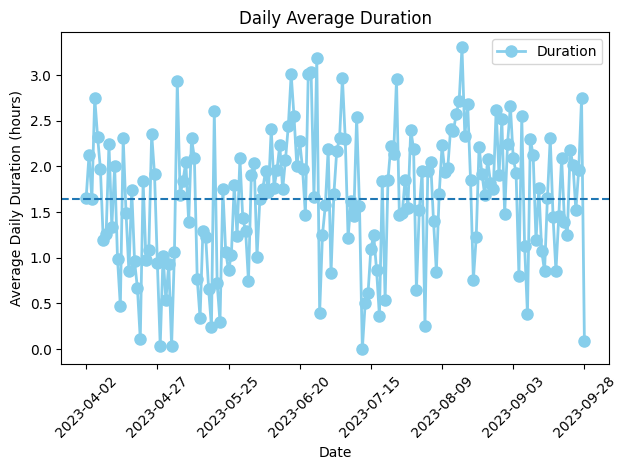

<Figure size 1200x600 with 0 Axes>

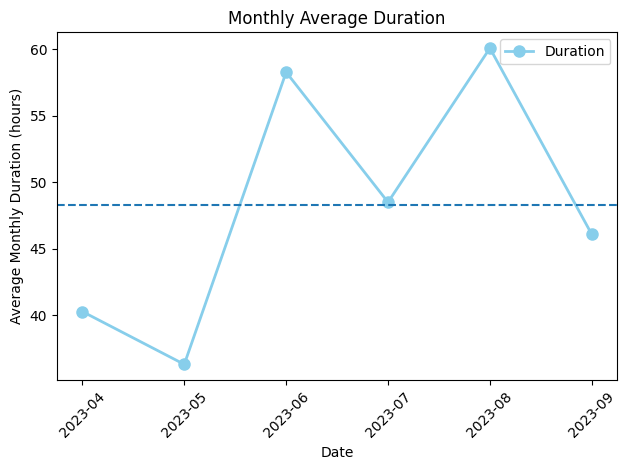

In [6]:

import numpy as np

# Visualize daily average session durations
plt.figure(figsize=(12, 6))
total_duration_per_day.plot(kind='line', marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Date')
plt.ylabel('Average Daily Duration (hours)')
plt.title('Daily Average Duration')
plt.axhline(y=np.nanmean(total_duration_per_day.Duration),linestyle="--", label='Avg')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Visualize monthly average session durations
plt.figure(figsize=(12, 6))
total_duration_per_month.plot(kind='line', marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Date')
plt.ylabel('Average Monthly Duration (hours)')
plt.title('Monthly Average Duration')
plt.axhline(y=np.nanmean(total_duration_per_month.Duration),linestyle="--")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

